In [18]:
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker

atlas = datasets.fetch_atlas_aal()
atlas_filename = atlas.maps
labels = atlas.labels

In [19]:
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, verbose=5)
time_series = masker.fit_transform("ABIDEII-STANFORD/30168/session_1/rest_1/rest.nii.gz")

[NiftiLabelsMasker.fit_transform] loading data from /home/loganj/nilearn_data/aal_SPM12/aal/atlas/AAL.nii
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from ABIDEII-STANFORD/30168/session_1/rest_1/rest.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


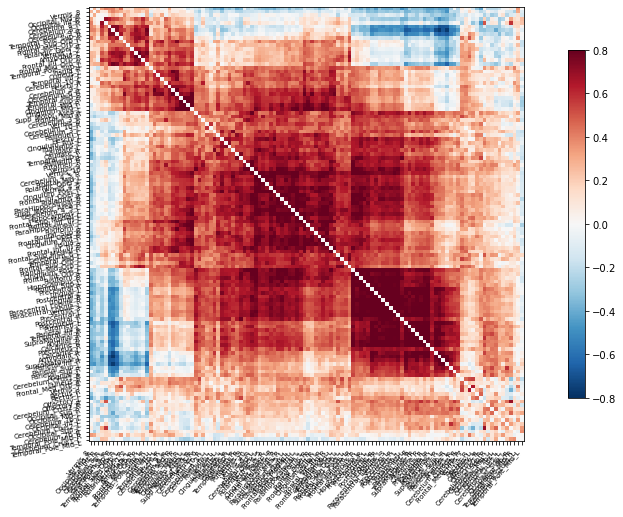

In [20]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=atlas.labels,
                     vmax=0.8, vmin=-0.8, reorder=True)

In [21]:
time_series.shape

(180, 116)

In [27]:
from nilearn.input_data import NiftiMapsMasker

msdl_data = datasets.fetch_atlas_msdl()

masker = NiftiMapsMasker(msdl_data.maps, standardize=True,
                         verbose=5)

time_series = masker.fit_transform("ABIDEII-STANFORD/30168/session_1/rest_1/rest.nii.gz")

/usr/lib64/python3.9/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/home/loganj/.local/lib/python3.9/site-packages/nilearn/image/image.py:1106: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


[NiftiMapsMasker.fit_transform] loading regions from /home/loganj/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[NiftiMapsMasker.transform_single_imgs] Loading data from ABIDEII-STANFORD/30168/session_1/rest_1/rest.nii.gz
[NiftiMapsMasker.transform_single_imgs] Extracting region signals
[NiftiMapsMasker.transform_single_imgs] Cleaning extracted signals


In [28]:
from sklearn.covariance import GraphicalLassoCV

estimator = GraphicalLassoCV()
estimator.fit(time_series)

/usr/lib64/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV()

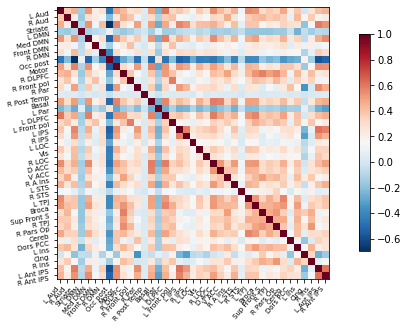

In [29]:
plotting.plot_matrix(estimator.covariance_, labels=msdl_data.labels)

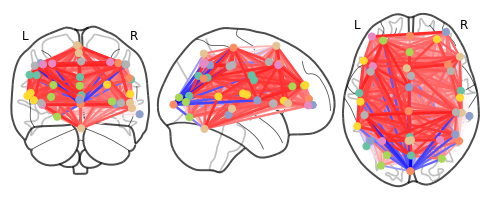

In [30]:
coords = msdl_data.region_coords

plotting.plot_connectome(estimator.covariance_, coords)

In [32]:
coords

[(-53.28, -8.88, 32.36),
 (53.47, -6.49, 27.52),
 (1.18, -74.54, 10.79),
 (-45.8, -64.78, 31.84),
 (-0.2, -55.21, 29.87),
 (-0.15, 51.42, 7.58),
 (51.66, -59.34, 28.88),
 (0.41, -91.05, 1.58),
 (-1.48, -27.93, 61.5),
 (40.1, 20.96, 44.72),
 (37.83, 55.49, 1.22),
 (47.53, -52.42, 43.06),
 (62.53, -32.99, -9.14),
 (-0.91, -2.75, 6.15),
 (-41.66, -59.04, 44.61),
 (-39.04, 19.28, 43.27),
 (-40.08, 50.65, 0.81),
 (-29.39, -59.43, 44.2),
 (31.6, -58.09, 45.69),
 (-30.54, -85.14, 9.1),
 (-24.29, -74.28, -11.74),
 (33.4, -77.96, 4.31),
 (-28.17, 46.32, 21.56),
 (-0.45, 34.06, 20.73),
 (28.38, 47.72, 22.13),
 (-52.12, -17.92, 13.28),
 (52.61, -13.65, 12.11),
 (-55.52, -43.77, 10.08),
 (-48.66, 25.11, 5.7),
 (-3.39, 17.19, 63.52),
 (54.42, -29.5, -2.72),
 (52.38, 29.39, 2.93),
 (1.05, -58.49, -23.91),
 (-1.44, -59.12, 55.25),
 (-41.33, 13.63, 2.7),
 (1.05, 9.2, 46.43),
 (43.01, 14.3, 2.79),
 (-47.85, -32.07, 41.9),
 (48.36, -29.04, 43.13)]

In [35]:
atlas

{'description': b'AAl atlas for SPM 12\n\n\nNotes\n-----\nThis atlas is the result of an automated anatomical parcellation of the spatially normalized single-subject high-resolution T1 volume provided by the Montreal Neurological Institute (MNI) (D. L. Collins et al., 1998, Trans. Med. Imag. 17, 463-468, PubMed).\n\nUsing this parcellation method, three procedures to perform the automated anatomical labeling of functional studies are proposed: (1) labeling of an extremum defined by a set of coordinates, (2) percentage of voxels belonging to each of the AVOI intersected by a sphere centered by a set of coordinates, and (3) percentage of voxels belonging to each of the AVOI intersected by an activated cluster.\n\n\nContent\n-------\n    :"regions": str. path to nifti file containing regions.\n    :"labels": dict. labels dictionary with their region id as key and name as value\n\n\nReferences\n-----\nFor more information on this dataset\'s structure, see\nhttp://www.gin.cnrs.fr/AAL-217?la